In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
from matplotlib import pyplot as plt
import sys, os
sys.path.insert(0, os.path.abspath('..'))
path = "\\analysis\\Jonathan"
from scripts import project_functions as sc
df = sc.load_and_process(path)
df

,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Episode Date,Reported Date,Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,Sporadic,50-59,Willowdale East,M2N,Travel,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
1,Sporadic,50-59,Willowdale East,M2N,Travel,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
2,Sporadic,20-29,Parkwoods-Donalda,M3A,Travel,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,Outbreak Associated,50-59,Moss Park,M5A,N/A - Outbreak associated,2020-02-07,2020-04-13,MALE,RESOLVED,No,No,No,No,No,No
4,Sporadic,70-79,Don Valley Village,M2J,Travel,2020-02-14,2020-03-01,FEMALE,RESOLVED,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13212,Sporadic,60-69,Henry Farm,M2J,Close contact,2020-07-12,2020-06-28,FEMALE,RESOLVED,No,No,No,No,No,No
13213,Sporadic,19 and younger,Maple Leaf,M6L,Close contact,2020-07-12,2020-07-12,FEMALE,ACTIVE,No,No,No,No,No,No
13214,Sporadic,30-39,L'Amoreaux,M1W,Close contact,2020-07-12,2020-07-12,MALE,ACTIVE,No,No,No,No,No,No
13215,Sporadic,30-39,Thistletown-Beaumond Heights,M9V,Travel,2020-07-12,2020-07-12,MALE,ACTIVE,No,No,No,No,No,No


In [4]:
"""
db = df.set_index(["Neighbourhood Name", "Outbreak Associated"]).count(level="Neighbourhood Name")
db = db.drop(['Age Group','Source of Infection', 'Sex', 'Outcome','Currently Hospitalized','Currently in ICU','Currently Intubated','Ever Hospitalized','Ever in ICU','Ever Intubated','Incubation Time'],axis=1)
db.to_csv()
db
#lat = [[43.80682993417276, -79.19256010124776]],[43.787350204910574, -79.1598030501702],[43.76899947866263, -79.18221627975953]]
#lat
"""

'\ndb = df.set_index(["Neighbourhood Name", "Outbreak Associated"]).count(level="Neighbourhood Name")\ndb = db.drop([\'Age Group\',\'Source of Infection\', \'Sex\', \'Outcome\',\'Currently Hospitalized\',\'Currently in ICU\',\'Currently Intubated\',\'Ever Hospitalized\',\'Ever in ICU\',\'Ever Intubated\',\'Incubation Time\'],axis=1)\ndb.to_csv()\ndb\n#lat = [[43.80682993417276, -79.19256010124776]],[43.787350204910574, -79.1598030501702],[43.76899947866263, -79.18221627975953]]\n#lat\n'

In [5]:
"""
import geocoder 
g = geocoder.google('Agincourt North')
g.latlng
"""

"\nimport geocoder \ng = geocoder.google('Agincourt North')\ng.latlng\n"

<AxesSubplot:xlabel='Age Group', ylabel='count'>

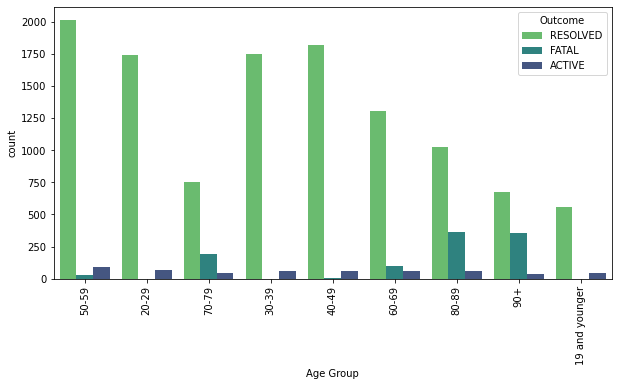

In [6]:
df = sc.load_and_process(path)
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x= 'Age Group',hue = 'Outcome', data=df,palette = 'viridis_r' )

ValueError: Could not interpret input 'Sex'

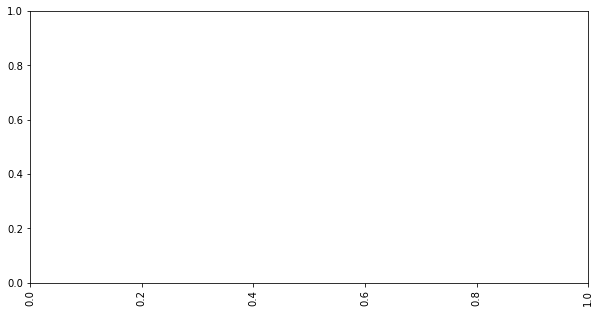

In [7]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x= 'Sex',hue = 'Outcome', data=df,palette = 'viridis_r' )
#to-do: trim data into  two sets of male/female and display age buckets vs outcome for each

'\nClassification Countplot\nMassive percentage of 19> people are not confirmed cases\n?unreliability of tests on younger people?\n?lack of symptoms in younger people?\n'

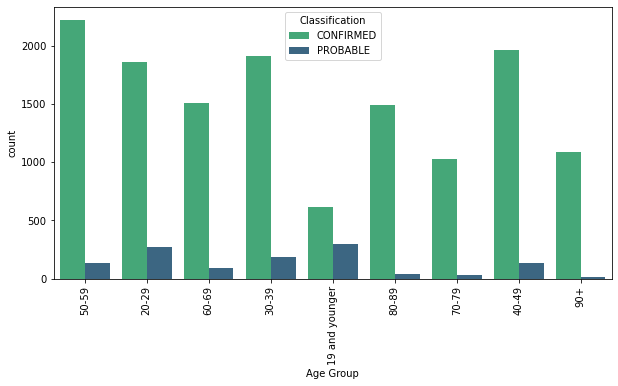

In [8]:
df = pd.read_csv(sc.autopath(path))#need raw data to account for all potential cases
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x= 'Age Group',hue = 'Classification',data = df, palette = 'viridis_r' )
"""
Classification Countplot
Massive percentage of 19> people are not confirmed cases
?unreliability of tests on younger people?
?lack of symptoms in younger people?
"""

'\nHospitalized Countplot\nMajority of infections never hospitalized\nMuch higher percentage of elderly are hospitalized\n'

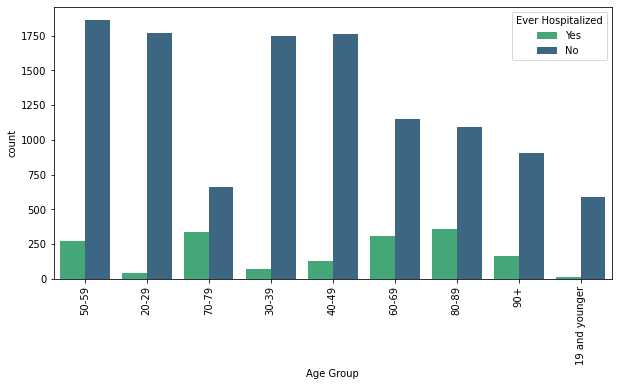

In [9]:
df = sc.load_and_process(path)
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x= 'Age Group',hue = 'Ever Hospitalized',data = df, palette = 'viridis_r' )
"""
Hospitalized Countplot
Majority of infections never hospitalized
Much higher percentage of elderly are hospitalized
"""

'\nICU Countplot\n**Need to trim out FALSE values**\n'

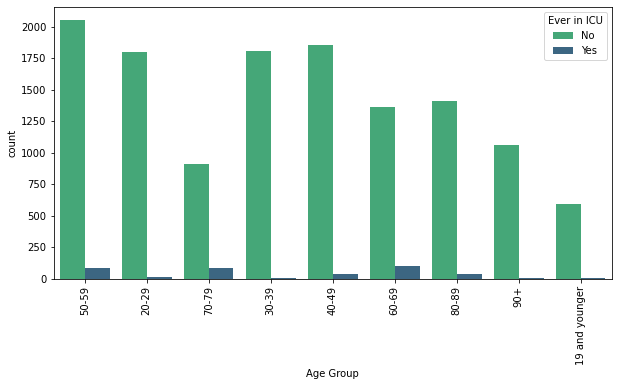

In [10]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x= 'Age Group',hue = 'Ever in ICU',data = df, palette = 'viridis_r' )
"""
ICU Countplot
**Need to trim out FALSE values**
"""

'\nIntubation Countplot\nIntubation chart indicates that any infected that are admitted into the ICU are also intubated\n**Need to trim out FALSE values**\n'

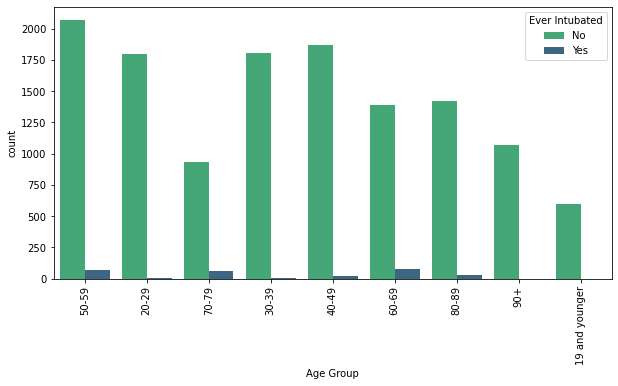

In [11]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x= 'Age Group',hue = 'Ever Intubated',data = df, palette = 'viridis_r' )
"""
Intubation Countplot
Intubation chart indicates that any infected that are admitted into the ICU are also intubated
**Need to trim out FALSE values**
"""

In [13]:
#heatmap needs neighbourhoood convert to long/lat -> mapped over time buckets